In [1]:
# !pip install nidaqmx

In [2]:
import numpy as np
import matplotlib.pyplot as plt  # for plotting the data
import nidaqmx.system


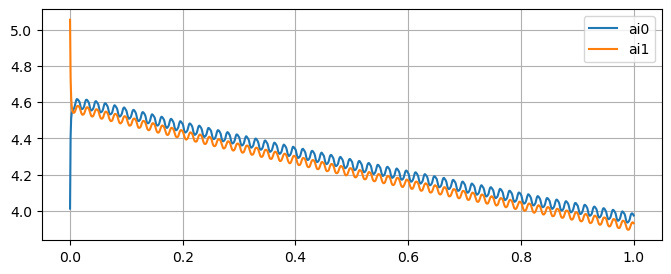

In [38]:
daq_fs = 1000  # 200 kS/s máximo
Nmax =1000
Tgraf = 1
daq_voltage_scale = 1.5  # volts
t = np.linspace(0,Tgraf,round(Tgraf*daq_fs))
if len(t)>Nmax:
    t = t[0:Nmax]
with nidaqmx.Task() as task:
    task.ai_channels.add_ai_voltage_chan('myDAQ1/ai0')
    task.ai_channels.add_ai_voltage_chan('myDAQ1/ai1')
    task.timing.cfg_samp_clk_timing(daq_fs)
    ai = task.read(number_of_samples_per_channel=len(t))
    ai0,ai1 =ai[0][:],ai[1][:]
    plt.figure(figsize=[8,3])
    plt.plot(t,ai0,t,ai1); plt.legend(['ai0','ai1']); plt.grid()
